# Author : Pushkar Zend
## The Spark Foundation.
### Task 5  : Exploratory Data Analysis - Sports
### *Objevtives
#### 1)Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
#### 2)As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
#### 3)Suggest teams or players a company should endorse for its products.

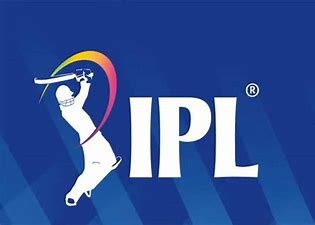

### Analyzing the data set

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#importing the dataset
match =pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')


In [4]:
match.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Umpire 3 column has much null values.

In [8]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
#as umpire 3 column has too many null values we drop this column
match.drop('umpire3',axis=1,inplace=True) 

In [11]:
#looking for rows which have null cities.
match.loc[match['city'].isnull()==True]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


By looking at the venue of the matches we are replacing the Nan by Abu dabi.

In [12]:
match['city'].fillna('Abu Dhabi',inplace=True)

In [13]:
#Now for winner row
match.loc[match['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


As there is no result in this matches we are going to replace this NaN values with tie.

In [14]:
match['winner'].fillna('Tie',inplace=True)

In [15]:
#Now for the player of the match column
match[match['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,Tie,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Tie,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,Tie,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Tie,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


Nobody is the player of the match as all matches in this rows are tie. We replace NaN with the No.

In [16]:
match['player_of_match'].fillna('No',inplace=True)

In [17]:
#Now for umpire 1 column
match[match['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [18]:
match.umpire1.value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
Sundaram Ravi       1
SJA Taufel          1
Ulhas Gandhe        1
Nanda Kishore       1
A Nanda Kishore     1
Name: umpire1, Length: 61, dtype: int64

You can see that HDPK Dharmasena has umpired most of the matches. It is most occurede element in the given column. So we are replacing NaN with HDPK Dharmasena.

In [19]:
match['umpire1'].fillna('HDPK Dharmasena',inplace=True)

In [20]:
#similarly for umpire 2
match[match['umpire2'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,NaN


In [21]:
match.umpire2.value_counts()

C Shamshuddin            57
S Ravi                   57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
                         ..
Kumar Dharmasena          1
SJ Davis                  1
Ian Gould                 1
KN Ananthapadmanabhan     1
Nand Kishore              1
Name: umpire2, Length: 65, dtype: int64

In [22]:
match['umpire2'].fillna('S Ravi',inplace=True)

In [23]:
#Now we do not have any null values in the data set.
match.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

Cleaning is completed.

In [24]:
#looking for the teams.
match.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

If you look at the names of the teams. They are seems to be repeated not exactly but same team with the different name.
Lets replace such team names.

In [25]:
match.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
match.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
match.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
match.replace('Pune Warriors','Rising Pune Supergiants',inplace=True)

In [26]:
#now look at the teams
match.team1.value_counts()

Sunrisers Hyderabad            106
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Rising Pune Supergiants         35
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [27]:
#Processed data set is
match.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi


In [28]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(5), object(12)
memory usag

## Visualisation of the data

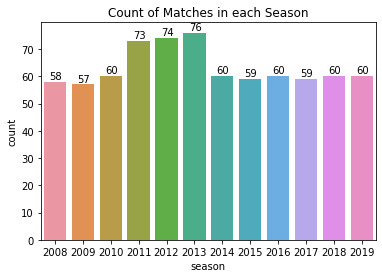

<Figure size 864x432 with 0 Axes>

In [29]:
#visualising number of matches played in each season
ax=sns.countplot(data=match,x='season')
plt.title('Count of Matches in each Season')
plt.figure(figsize=(12,6))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))
plt.show()


About 76 matches played in the season 2013

In [30]:
match.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [31]:
match.replace('M. Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)

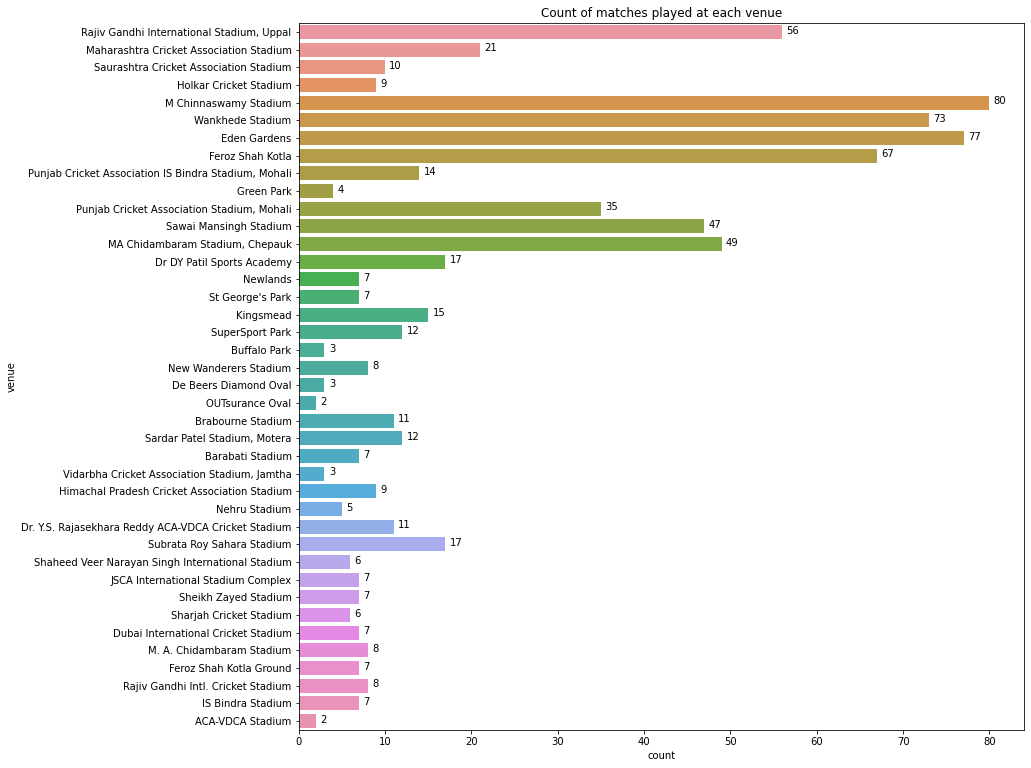

In [32]:
#Count of matches at the venues
plt.figure(figsize=(13,13))
ax2=sns.countplot(data=match,y='venue')
for p in ax2.patches:
    ax2.annotate(format(p.get_width()), (p.get_width()+0.5,p.get_y()+0.5, ))
plt.title('Count of matches played at each venue')
plt.show()

Maximum number of matches are played at M Chinnaswamy stadium. Count of the matches is 80, followed by  Eaden Garden and Wankhede stadium each having  matches 77 and 73 repectively.

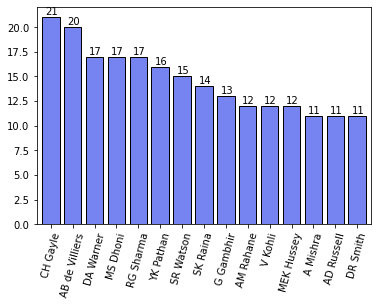

In [33]:
#Visualisation of the player of the match
ax3=match['player_of_match'].value_counts().head(15).plot.bar(width=0.8,color=(0.1, 0.2, 0.9, 0.6),edgecolor='black')
plt.xticks(rotation='75')
for p in ax3.patches:
    ax3.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

In [34]:
match.venue.value_counts()

M Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [35]:
match.replace('M. Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)

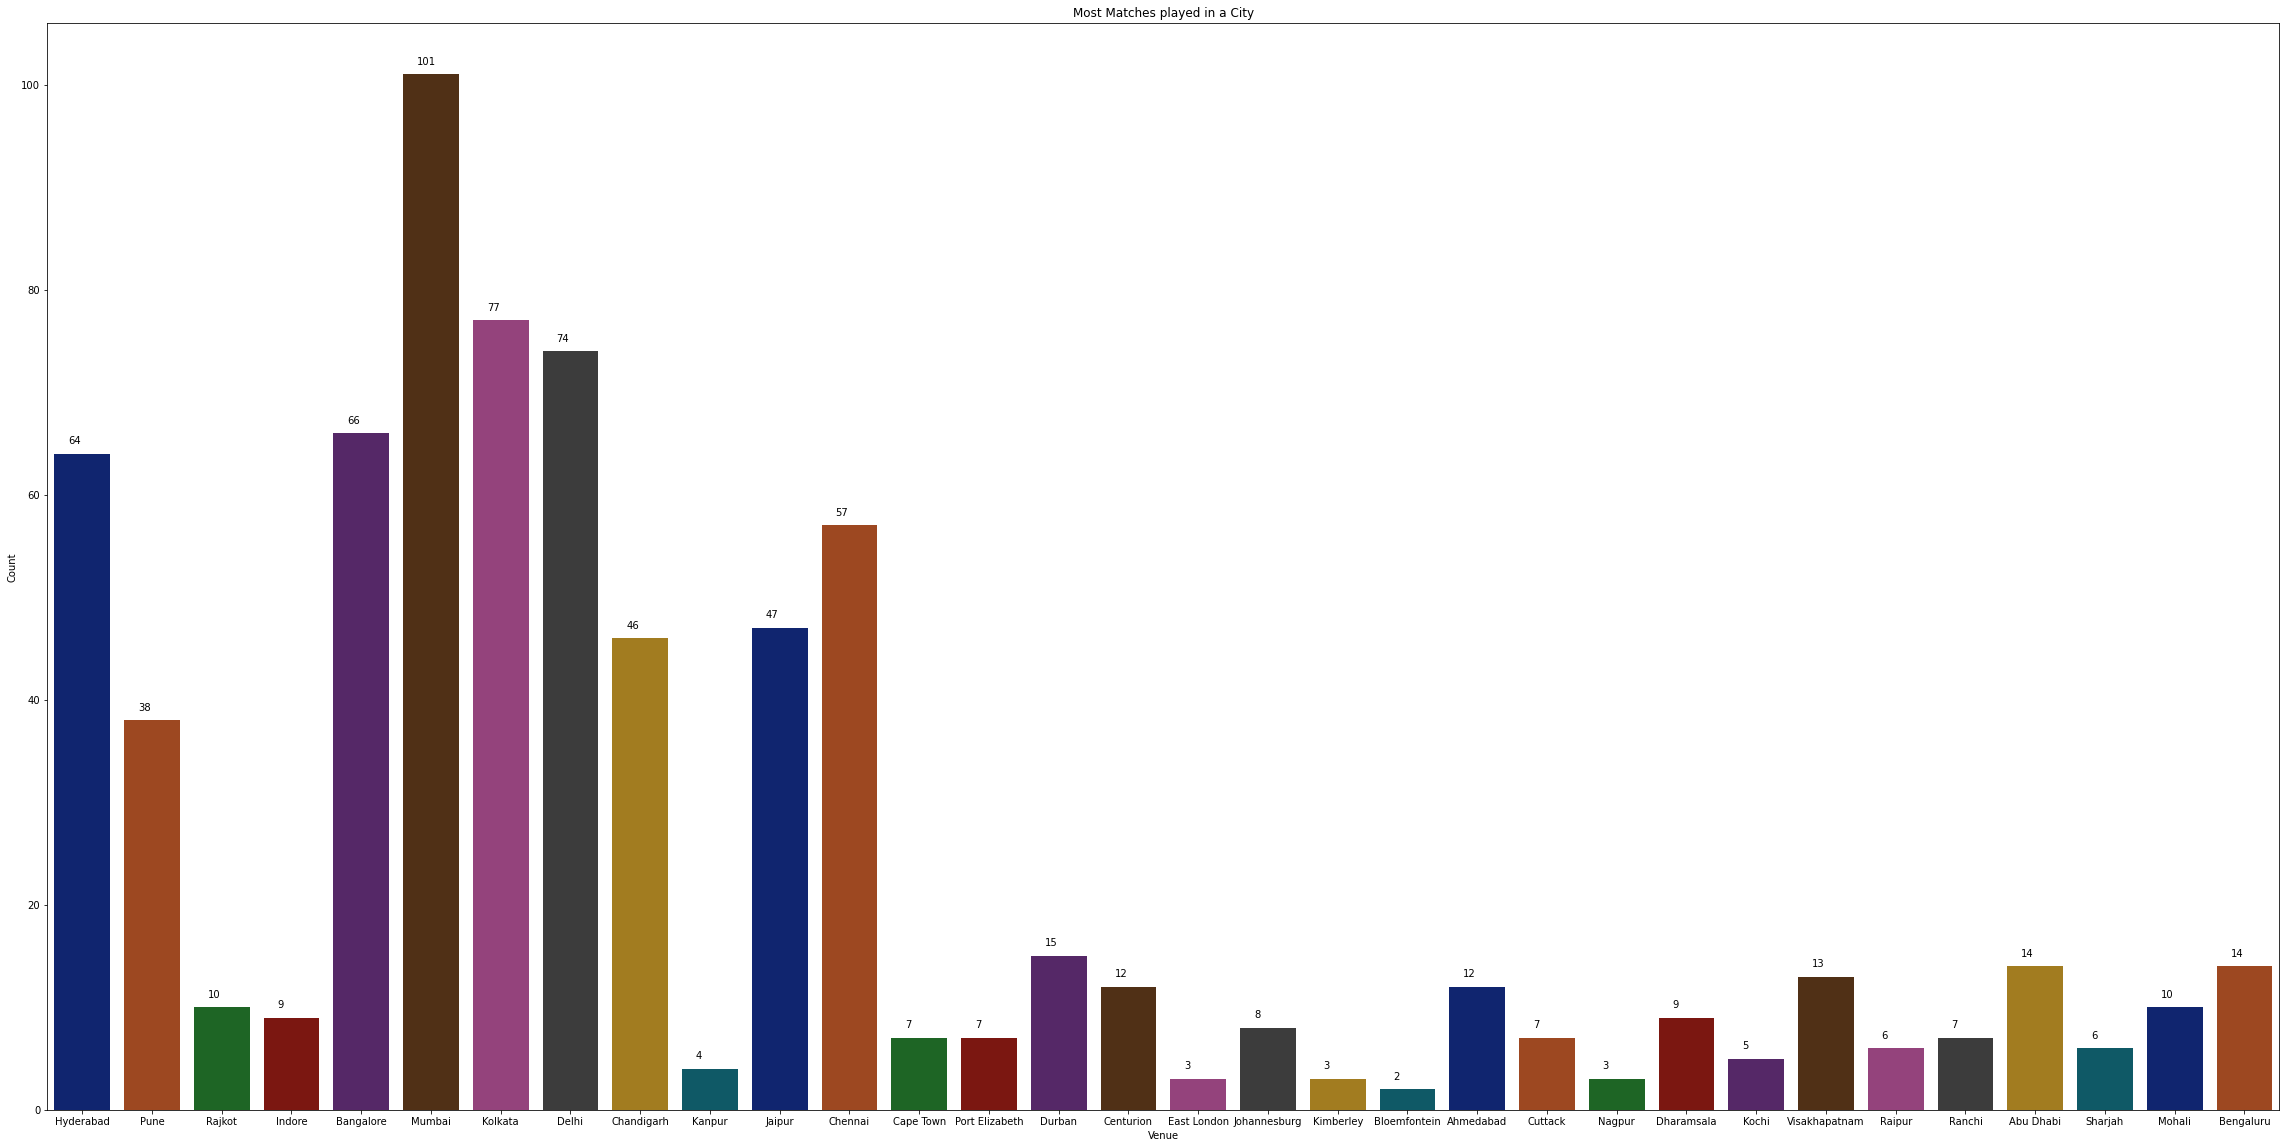

In [36]:
# Most matches played at a venue
plt.subplots(figsize=(40,20))
ax=sns.countplot(x='city',data=match,palette='dark')
plt.title('Most Matches played in a City')
plt.ylabel('Count')
plt.xlabel('Venue')

# Code to display the above values
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
plt.show()

Most of the matches are played in the Mumbai and they are around 101 matches.

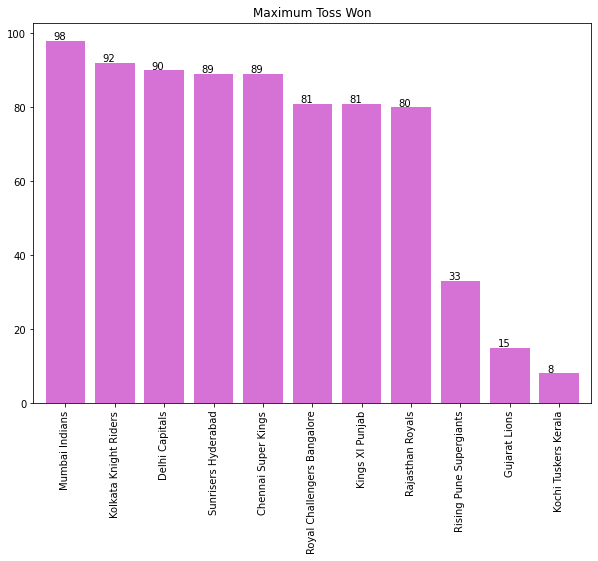

In [37]:
#Maximum Toss Won:
plt.subplots(figsize=(10,7))
ax10=match['toss_winner'].value_counts().plot.bar(width=0.8,color=(0.8, 0.3, 0.8, 0.8))
plt.title("Maximum Toss Won")
for p in ax10.patches:
    ax10.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.35))
plt.show()

In [58]:
#toss decision 
#how many times choose to bad and field.
match['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

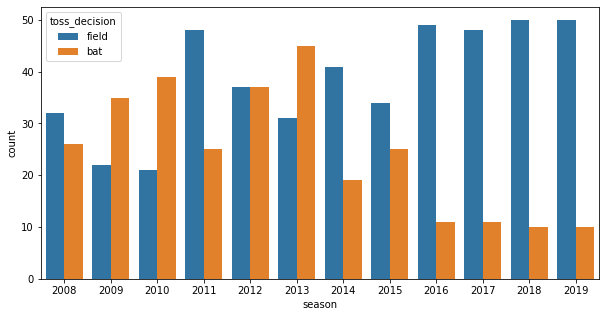

In [38]:
#Toss Win in each season.

plt.subplots(figsize=(10,5))
sns.countplot(x="season",hue="toss_decision",data=match)
plt.show()

Most of the teams select to field as a decision of winnig the toss.

In [44]:
#Winner according to the decision of  bat and field.
batting_first=match[match['win_by_runs']!=0]  #!=0 is not equal to operator.
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


In [45]:
# Teams which win most by Batting first

batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Sunrisers Hyderabad            48
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Delhi Capitals                 28
Rajasthan Royals               27
Rising Pune Supergiants        13
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

Mumbai Indians is the team which won 57 matches by runs.

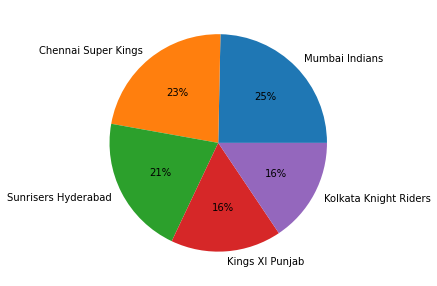

In [47]:
#pie chart for batting first
plt.figure(figsize=(12,5))
plt.pie(list(batting_first['winner'].value_counts()[0:5]),labels=list(batting_first['winner'].value_counts()[0:5].keys()),autopct='%1.0f%%') 
plt.show()

The graph shows that mumbai indians had won most of the matched as batting first.

In [49]:
#Win by wickets.
bat_2nd=match[match['win_by_wickets']!=0]
bat_2nd.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


In [51]:
bat_2nd['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Delhi Capitals                 48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Sunrisers Hyderabad            38
Rising Pune Supergiants        14
Gujarat Lions                  12
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

Kolkata Knight riders had win 56 matches as choosing to field first.

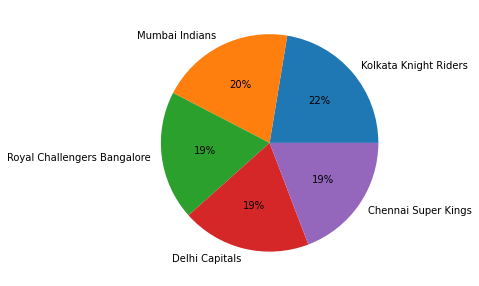

In [53]:
#pie chart for bat_2nd
plt.figure(figsize=(12,5))
plt.pie(list(bat_2nd['winner'].value_counts()[0:5]),labels=list(bat_2nd['winner'].value_counts()[0:5].keys()),autopct='%1.0f%%') 
plt.show()

In [54]:
#for result
match['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

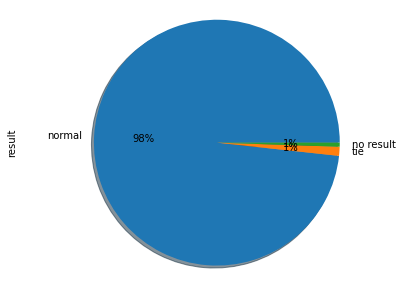

In [56]:
plt.figure(figsize=(7,5))
round(match['result'].value_counts(normalize=True)*100,2).plot.pie(autopct='%1.0f%%',shadow=True)
plt.axis('equal')
plt.show()

## Now for the second data set "delivery"
### We had just analysed the data delivery above but not performed any operation on it. Lets visualise the delivery data

In [59]:
delivery.duplicated().sum()

23

In [60]:
delivery.drop_duplicates(inplace=True)

In [61]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

In [63]:
#dropping columns with most null values count
delivery.drop(['player_dismissed','fielder'],axis=1 ,inplace=True)

In [64]:
#dismissal_kind 
delivery['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [65]:
#filling null values to the dismissal count.
delivery['dismissal_kind'].fillna('caught',inplace=True)

In [67]:
delivery.isnull().sum()

match_id          0
inning            0
batting_team      0
bowling_team      0
over              0
ball              0
batsman           0
non_striker       0
bowler            0
is_super_over     0
wide_runs         0
bye_runs          0
legbye_runs       0
noball_runs       0
penalty_runs      0
batsman_runs      0
extra_runs        0
total_runs        0
dismissal_kind    0
dtype: int64

Cleaning Completed.

In [68]:
#as done for the matches we look for the duplicate names of the teams.
delivery['batting_team'].value_counts()

Mumbai Indians                 22615
Kings XI Punjab                20929
Royal Challengers Bangalore    20905
Kolkata Knight Riders          20852
Chennai Super Kings            19761
Delhi Daredevils               18786
Rajasthan Royals               17287
Sunrisers Hyderabad            12907
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1908
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [69]:
delivery.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
delivery.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
delivery.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
delivery.replace('Pune Warriors','Rising Pune Supergiants',inplace=True)

In [70]:
delivery['batting_team'].value_counts()

Mumbai Indians                 22615
Sunrisers Hyderabad            21941
Kings XI Punjab                20929
Royal Challengers Bangalore    20905
Kolkata Knight Riders          20852
Delhi Capitals                 20694
Chennai Super Kings            19761
Rajasthan Royals               17287
Rising Pune Supergiants         8923
Gujarat Lions                   3566
Kochi Tuskers Kerala            1582
Name: batting_team, dtype: int64

In [71]:
#Most number of overs faced by the team
overs_batted=delivery.groupby(['batting_team']).sum()
overs_batted['total_balls']=delivery['batting_team'].value_counts()
overs_batted['overs']=(overs_batted['total_balls']//6)
overs_batted[overs_batted['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,batting_team,overs
0,Mumbai Indians,3769
1,Sunrisers Hyderabad,3656
2,Kings XI Punjab,3488
3,Royal Challengers Bangalore,3484
4,Kolkata Knight Riders,3475


Mumbai Indians is the team who had faced most number of overs.

In [73]:
#maximum number of over ball by player
max_overs=delivery.groupby(['bowler']).sum()
max_overs['total_balls']=delivery['bowler'].value_counts()
max_overs['overs']=(max_overs['total_balls']//6)
max_overs[max_overs['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495


Harbhajan Singh had bowled maximum number of overs.

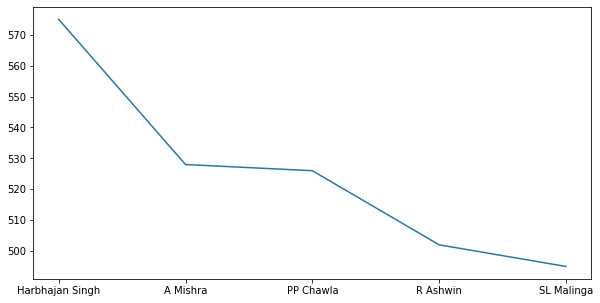

In [74]:
#graph for the player who balled max overs.
plt.figure(figsize=(10,5))
plt.plot(max_overs['overs'].sort_values(ascending=False)[0:5])
plt.show()

In [75]:
#PLayer scoring maximum runs
max_runs=delivery.groupby(['batsman'])['batsman_runs'].agg('sum').sort_values(ascending=False).reset_index()
max_runs.head()

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4631


Virat Kohli had scored the maximum runs.

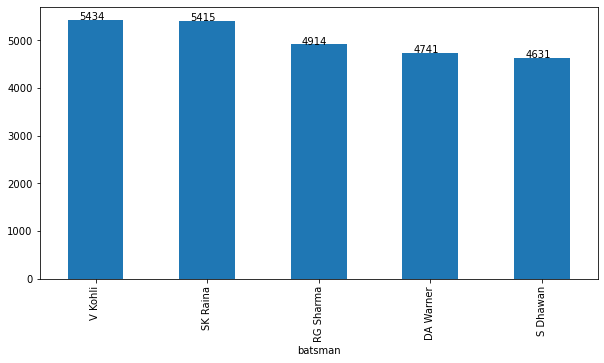

In [80]:
#Graph for the player scoring max runs
plt.figure(figsize=(10,5))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:5].plot.bar()
# To display the count
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

plt.show()

In [82]:
#top wicket takers
delivery['dismissal_kind'].value_counts()

caught                   175569
bowled                     1581
run out                     852
lbw                         540
stumped                     278
caught and bowled           211
retired hurt                 12
hit wicket                   10
obstructing the field         2
Name: dismissal_kind, dtype: int64

In [89]:
wk_taken=delivery[(delivery["dismissal_kind"] == 'caught') | 
              (delivery["dismissal_kind"] == 'bowled') | (delivery["dismissal_kind"] == 'run out') | 
              (delivery["dismissal_kind"] == 'lbw') | (delivery["dismissal_kind"] == 'stumped') | 
              (delivery["dismissal_kind"] == 'caught and bowled') | 
              (delivery["dismissal_kind"] == 'hit wicket')].groupby("bowler")['bowler'].count().sort_values(ascending = False)

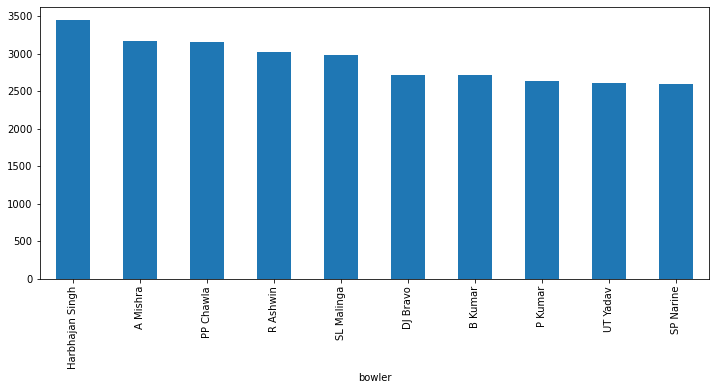

In [94]:
plt.figure(figsize=(12,5))
wickets=delivery.groupby(['bowler'])['dismissal_kind'].count()
ax=wickets.sort_values(ascending=False)[:10].plot.bar()
plt.show()

In [95]:
#best economy rate
best_economy=delivery.groupby(['bowler']).sum()
best_economy['total_balls']=delivery['bowler'].value_counts()
best_economy['overs']=(best_economy['total_balls']//6)
best_economy['economy_rate']=(best_economy['total_runs']//best_economy['overs'])
best_economy[best_economy['overs']>=200].head().sort_values(by='economy_rate',ascending=True).reset_index()

,bowler,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,total_balls,overs,economy_rate
0,A Mishra,5428006,4908,36354,11346,0,57,6,40,20,0,3727,123,3850,3172,528,7.0
1,A Nehra,640241,2942,17190,7137,0,64,2,40,9,0,2422,115,2537,1974,329,7.0
2,AB Dinda,505007,2273,14072,5814,0,72,8,22,14,0,1987,116,2103,1589,264,7.0
3,AR Patel,5264123,2612,18925,6216,0,37,9,35,0,0,2102,81,2183,1745,290,7.0
4,B Kumar,7260315,4117,24959,9788,0,110,6,73,8,0,3067,197,3264,2707,451,7.0



Best Economy Rate as per Minimum Overs 200

A. Mishra

A Nehra

AB Dinda

AR Patel

B Kumar

In [97]:
#Strike rate
batsmen_summary = delivery.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen_summary.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen_summary = batsmen_summary.sort_values(['balls','runs'], ascending=False)
batsmen_summary.head(10)

,balls,runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3775,4631
G Gambhir,3524,4223
RV Uthappa,3490,4444
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3212,3844


In [98]:
batsmen_summary['batting_strike_rate'] = batsmen_summary['runs']/batsmen_summary['balls'] * 100
batsmen_summary['batting_strike_rate'] = batsmen_summary['batting_strike_rate'].round(2)
batsmen_summary.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3775,4631,122.68
G Gambhir,3524,4223,119.84
RV Uthappa,3490,4444,127.34
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3212,3844,119.68


Best batting Strike rate is maintained by the Virat Kohli.

## Conclusion
#### About 76 matches played in the season 2013.
#### Maximum number of matches are played at M Chinnaswamy stadium. Count of the matches is 80, followed by Eaden Garden and Wankhede stadium each having matches 77 and 73 repectively.
#### Most of the toss winners are likely to choose fielding.
#### Maximum tosses are won by Mumbai Indians.
#### Batting First- Mumbai Indians have won-57 Matches.
#### Batting 2nd- KKR have won 56 Matches.
#### Most the matches are held in Mumbai,Delhi,Kolkata.
#### VK Kohli is the leading run Scorer in the IPL with 5434 runs.
#### Harbhajan Singh is the leading wicket taker with 2989 wickets followed by LS Malings 2974 wickets.
#### A. mIshra have the best economy rate(min 200 over) in season 2008 to 2019.(Rate = 7)
#### Virat Kohali has maintained the best strike rate.(129)